## 지역별 1차/2차 산업 종사자 비율 (2021년 기준)
- 분류 기준
    - 1차 산업: 농업, 임업, 어업
    - 2차 산업: 광업, 제조업, 건설업

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\ooeee_000\anaconda3\envs\data_venv\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [61]:
# 한글 문제
# matplotlib의 기본 폰트에서 한글 지원되지 않기 때문에
# matplotlib의 폰트 변경 필요
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')

In [3]:
df = pd.read_excel('./data/시군구_산업별_취업자_2021.xlsx', engine='openpyxl')
df

,코드,SIG_CD,지역,시군구,행정구역별,total(명),1차산업취업자수,2차산업취업자수
0,1101,11110,서울,종로구,서울 종로구,75450.0,250.0,10950.0
1,1102,11140,서울,중구,서울 중구,66250.0,0.0,12000.0
2,1103,11170,서울,용산구,서울 용산구,121850.0,0.0,16700.0
3,1104,11200,서울,성동구,서울 성동구,146900.0,100.0,22850.0
4,1105,11215,서울,광진구,서울 광진구,181500.0,0.0,28850.0
...,...,...,...,...,...,...,...,...
223,3838,48870,경남,함양군,함양군,22700.0,8800.0,2900.0
224,3839,48880,경남,거창군,거창군,35300.0,12600.0,4900.0
225,3840,48890,경남,합천군,합천군,24650.0,11050.0,2650.0
226,3901,50110,제주,제주시,제주시,272800.0,28250.0,37900.0


In [12]:
target = pd.read_csv('./data/인구감소지역.csv', encoding='cp949')
target

,SIG_CD,지역,시군구,구분
0,11110,서울,종로구,안심
1,11140,서울,중구,안심
2,11170,서울,용산구,안심
3,11200,서울,성동구,안심
4,11215,서울,광진구,안심
...,...,...,...,...
256,48870,경남,함양군,감소
257,48880,경남,거창군,감소
258,48890,경남,합천군,감소
259,50110,제주,제주시,안심


In [32]:
df1 = pd.merge(df, target[['SIG_CD', '구분']], how='outer', on='SIG_CD')
df1.head(3)

,코드,SIG_CD,지역,시군구,행정구역별,total(명),1차산업취업자수,2차산업취업자수,구분
0,1101.0,11110,서울,종로구,서울 종로구,75450.0,250.0,10950.0,안심
1,1102.0,11140,서울,중구,서울 중구,66250.0,0.0,12000.0,안심
2,1103.0,11170,서울,용산구,서울 용산구,121850.0,0.0,16700.0,안심


In [39]:
pop = pd.read_excel('./data/pop_10-21_total-.xlsx', engine='openpyxl')
pop.tail()

,SIG_CD,지역,행정구역(시군구)별,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
273,48880.0,경남,거창군,63421,63146,63103,63177,63137,63232,63308,62763,62455,62179,61502,61073
274,48890.0,경남,합천군,51092,50608,50279,50290,50457,49145,48026,47000,45916,45204,44006,42935
275,500.0,제주,제주특별자치도,571255,576156,583713,593806,607346,624395,641597,657083,667191,670989,674635,676759
276,50110.0,제주,제주시,417539,422790,429656,438165,448834,459876,470665,478700,485946,489405,492466,493096
277,50130.0,제주,서귀포시,153716,153366,154057,155641,158512,164519,170932,178383,181245,181584,182169,183663


In [40]:
df2 = pd.merge(df1, pop[['SIG_CD', 2021]], how='left', on='SIG_CD')
df2.tail()

,코드,SIG_CD,지역,시군구,행정구역별,total(명),1차산업취업자수,2차산업취업자수,구분,2021
256,NaN,48121,NaN,NaN,NaN,NaN,NaN,NaN,안심,218027
257,NaN,48123,NaN,NaN,NaN,NaN,NaN,NaN,안심,251562
258,NaN,48125,NaN,NaN,NaN,NaN,NaN,NaN,안심,181322
259,NaN,48127,NaN,NaN,NaN,NaN,NaN,NaN,안심,186881
260,NaN,48129,NaN,NaN,NaN,NaN,NaN,NaN,안심,194949


In [41]:
df2.dropna(subset=['행정구역별'], axis=0, inplace=True)
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 228 entries, 0 to 227
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   코드        228 non-null    float64
 1   SIG_CD    228 non-null    int64  
 2   지역        228 non-null    object 
 3   시군구       228 non-null    object 
 4   행정구역별     228 non-null    object 
 5   total(명)  228 non-null    float64
 6   1차산업취업자수  228 non-null    float64
 7   2차산업취업자수  228 non-null    float64
 8   구분        228 non-null    object 
 9   2021      228 non-null    object 
dtypes: float64(4), int64(1), object(5)
memory usage: 19.6+ KB


In [45]:
df2.loc[:, ['total(명)','1차산업취업자수','2차산업취업자수',2021]] = df2.loc[:, ['total(명)','1차산업취업자수','2차산업취업자수',2021]].astype('int')
df2.rename(coulmns={})
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 228 entries, 0 to 227
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   코드        228 non-null    float64
 1   SIG_CD    228 non-null    int64  
 2   지역        228 non-null    object 
 3   시군구       228 non-null    object 
 4   행정구역별     228 non-null    object 
 5   total(명)  228 non-null    int32  
 6   1차산업취업자수  228 non-null    int32  
 7   2차산업취업자수  228 non-null    int32  
 8   구분        228 non-null    object 
 9   2021      228 non-null    int32  
dtypes: float64(1), int32(4), int64(1), object(4)
memory usage: 16.0+ KB


In [49]:
df2['rate_industry1'] = round(df1['1차산업취업자수'] / df1['total(명)'] * 100, 2)
df2['rate_industry2'] = round(df1['2차산업취업자수'] / df1['total(명)'] * 100, 2)
df2.head(3)

,코드,SIG_CD,지역,시군구,행정구역별,total(명),1차산업취업자수,2차산업취업자수,구분,2021,rate_industry1,rate_industry2
0,1101.0,11110,서울,종로구,서울 종로구,75449,250,10950,안심,144683,0.33,14.51
1,1102.0,11140,서울,중구,서울 중구,66250,0,12000,안심,122499,0.00,18.11
2,1103.0,11170,서울,용산구,서울 용산구,121850,0,16700,안심,222953,0.00,13.71


In [53]:
df2.rename(columns={2021:'인구수_2021년'}, inplace=True)
df2.columns

Index(['코드', 'SIG_CD', '지역', '시군구', '행정구역별', 'total(명)', '1차산업취업자수',
       '2차산업취업자수', '구분', '인구수_2021년', 'rate_industry1', 'rate_industry2'],
      dtype='object')

In [63]:
mask1 = ['부산', '대구', '인천', '광주', '대전', '울산', '경기', '강원', '충북', '충남', '전북', '전남', '경북', '경남']
isin_filter = df2['지역'].isin(mask1)
df2_targetcity = df2[isin_filter]
df2_targetcity

,코드,SIG_CD,지역,시군구,행정구역별,total(명),1차산업취업자수,2차산업취업자수,구분,인구수_2021년,rate_industry1,rate_industry2
25,2101.0,26110,부산,중구,부산 중구,20000,100,2849,관심,40524,0.50,14.25
26,2102.0,26140,부산,서구,부산 서구,47849,550,8650,감소,105164,1.15,18.08
27,2103.0,26170,부산,동구,부산 동구,39200,50,7149,감소,87679,0.13,18.24
28,2104.0,26200,부산,영도구,부산 영도구,47850,600,11400,감소,110638,1.25,23.82
29,2105.0,26230,부산,부산진구,부산 부산진구,169100,100,33950,안심,353159,0.06,20.08
...,...,...,...,...,...,...,...,...,...,...,...,...
221,3836.0,48850,경남,하동군,하동군,25100,12050,2450,감소,43449,48.01,9.76
222,3837.0,48860,경남,산청군,산청군,22200,11350,2300,감소,34360,51.13,10.36
223,3838.0,48870,경남,함양군,함양군,22700,8800,2900,감소,38310,38.77,12.78
224,3839.0,48880,경남,거창군,거창군,35300,12600,4900,감소,61073,35.69,13.88


In [83]:
sns.set(font="Malgun Gothic", 
        rc={"axes.unicode_minus":False},
        style='darkgrid')
# sns.set_style('whitegrid')
colors = ['orange', '#ff5050', '#00ccff']
sns.set_palette(sns.color_palette(colors))

C:\Users\ooeee_000\anaconda3\envs\data_venv\lib\site-packages\seaborn\categorical.py:3540: UserWarning: 11.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\ooeee_000\anaconda3\envs\data_venv\lib\site-packages\seaborn\categorical.py:3540: UserWarning: 20.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\ooeee_000\anaconda3\envs\data_venv\lib\site-packages\seaborn\categorical.py:3540: UserWarning: 20.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\ooeee_000\anaconda3\envs\data_venv\lib\site-packages\seaborn\categorical.py:3540: UserWarning: 20.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\ooeee_000\anaconda3

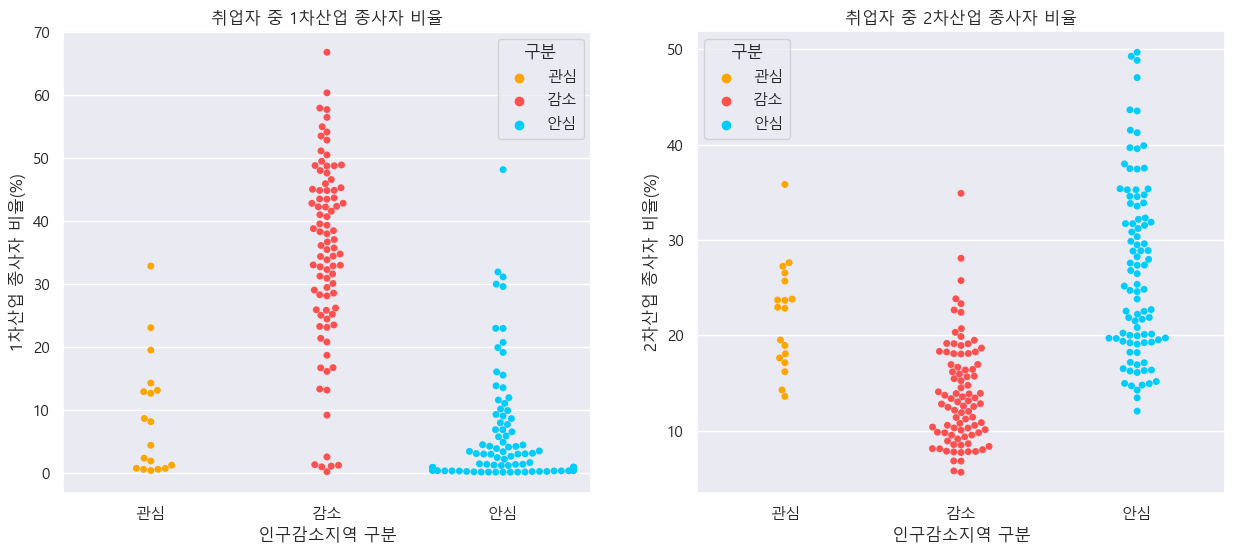


* 인구감소지역 89개 / 관심지역 18개 / 안심지역 94개 시군구
  (서울특별시, 세종시, 제주도 제외)


In [101]:
fig = plt.figure(figsize=(15,6))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

sns.swarmplot(x='구분', y='rate_industry1', data=df2_targetcity,
              hue='구분', ax=ax1)
ax1.set_title('취업자 중 1차산업 종사자 비율')
ax1.set_xlabel('인구감소지역 구분')
ax1.set_ylabel('1차산업 종사자 비율(%)')

sns.swarmplot(x='구분', y='rate_industry2', data=df2_targetcity,
              hue='구분', ax=ax2)
ax2.set_title('취업자 중 2차산업 종사자 비율')
ax2.set_xlabel('인구감소지역 구분')
ax2.set_ylabel('2차산업 종사자 비율(%)')
plt.savefig('./output/graph_2-1')
plt.show()

print('\n* 인구감소지역 {0}개 / 관심지역 {1}개 / 안심지역 {2}개 시군구'.format(len(df2_targetcity[df2_targetcity['구분']=='감소']),
                                                                            len(df2_targetcity[df2_targetcity['구분']=='관심']),
                                                                            len(df2_targetcity[df2_targetcity['구분']=='안심'])))
print('  (서울특별시, 세종시, 제주도 제외)')

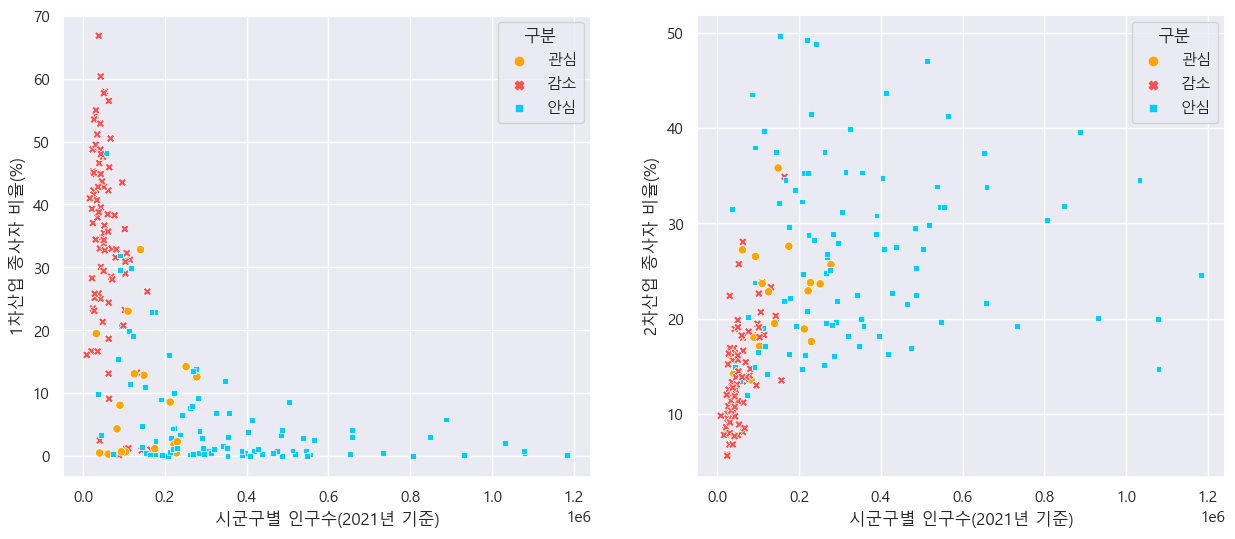


* 인구감소지역 89개 / 관심지역 18개 / 안심지역 94개 시군구
  (서울특별시, 세종시, 제주도 제외)


In [102]:
fig = plt.figure(figsize=(15,6))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

sns.scatterplot(x='인구수_2021년', y='rate_industry1', data=df2_targetcity,
                hue='구분', style='구분', ax=ax1)
ax1.set_xlabel('시군구별 인구수(2021년 기준)')
ax1.set_ylabel('1차산업 종사자 비율(%)')

sns.scatterplot(x='인구수_2021년', y='rate_industry2', data=df2_targetcity,
                hue='구분', style='구분', ax=ax2)
ax2.set_xlabel('시군구별 인구수(2021년 기준)')
ax2.set_ylabel('2차산업 종사자 비율(%)')
plt.savefig('./output/graph_2-2')
plt.show()

print('\n* 인구감소지역 {0}개 / 관심지역 {1}개 / 안심지역 {2}개 시군구'.format(len(df2_targetcity[df2_targetcity['구분']=='감소']),
                                                                            len(df2_targetcity[df2_targetcity['구분']=='관심']),
                                                                            len(df2_targetcity[df2_targetcity['구분']=='안심'])))
print('  (서울특별시, 세종시, 제주도 제외)')